In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pynamix import io, data, measure, color, plotting, exposure
%matplotlib inline

# Load example data

In [12]:
# ims,logfile = io.load_seq('pendulum',varian=True)
ims,logile = data.pendulum()
logfile['detectors'] = {}
logfile['detectors']['length'] = {}
logfile['detectors']['length']['height'] = 240. # mm
logfile['detectors']['resolution'] = {}
logfile['detectors']['resolution']['height'] = 960 # pixels
# im, logfile = io.load_seq('path_to_data') # load your own data
# save_as_tiffs('tt',ims,tmin=1000,tmax=1050,tstep=10) # save some of the SEQ file as tiffs in a folder `tt`

# Find min and max threshold values

In [8]:
w = plotting.hist_GUI(ims)
display(w)

interactive(children=(IntSlider(value=0, description='frame', max=9), IntSlider(value=0, description='vmin', m…

# Apply threshold

In [9]:
masked_ims = exposure.clamp(ims,w.kwargs['vmin'],w.kwargs['vmax'])

# Calculate size and orientation fields

10.205128205128204 0.9974937343358397


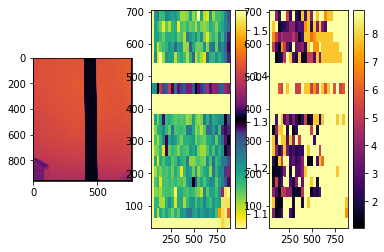

In [11]:
virino = color.virino()
X,Y,orient, dzeta = measure.orientation_map(masked_ims,logfile,tmin=1,tmax=2)
x,y,size = measure.average_size_map(masked_ims,logfile,tmin=1,tmax=2)

plt.subplot(131)
plt.imshow(masked_ims[0])
plt.subplot(132)
plt.pcolormesh(X,Y,orient[0],cmap=virino)
plt.colorbar()
plt.subplot(133)
plt.pcolormesh(x,y,size[0])
plt.colorbar()
plt.show()

# Load some PIVLab data

In [ ]:
x,y,u,v = io.load_PIVLab_txtfiles('/Volumes/LTS/DynamiX/PerpetualAvalanche/PerpetualAvalanche-3mm-4mm-80-20/PIV/',start=1000,end=1020,tstep=5)
plt.quiver(x,y,u[0,:,:],v[0,:,:])
plt.show()

In [6]:
logfile

{}